<a href="https://colab.research.google.com/github/Vrishin-Reddy/Mini_Proj/blob/master/Credit_Card_Fraud_Detection_(mini_proj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()


In [4]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')
data.head()
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df = data.copy()

In [6]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

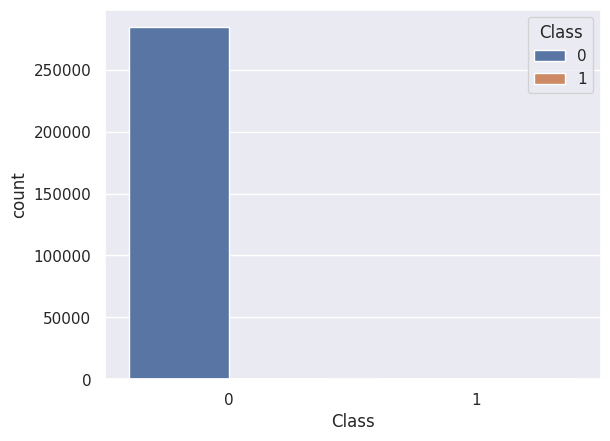

In [11]:
sns.countplot(x=df.Class, hue=df.Class)

<Axes: xlabel='Amount', ylabel='Density'>

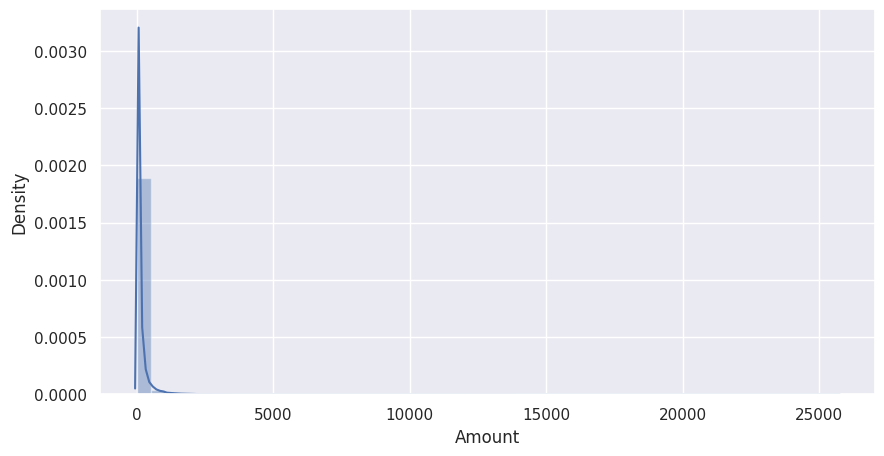

In [12]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [13]:
df['Amount-Bins'] = ''

In [14]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)

    return bins, bin_labels

In [15]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [16]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [17]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

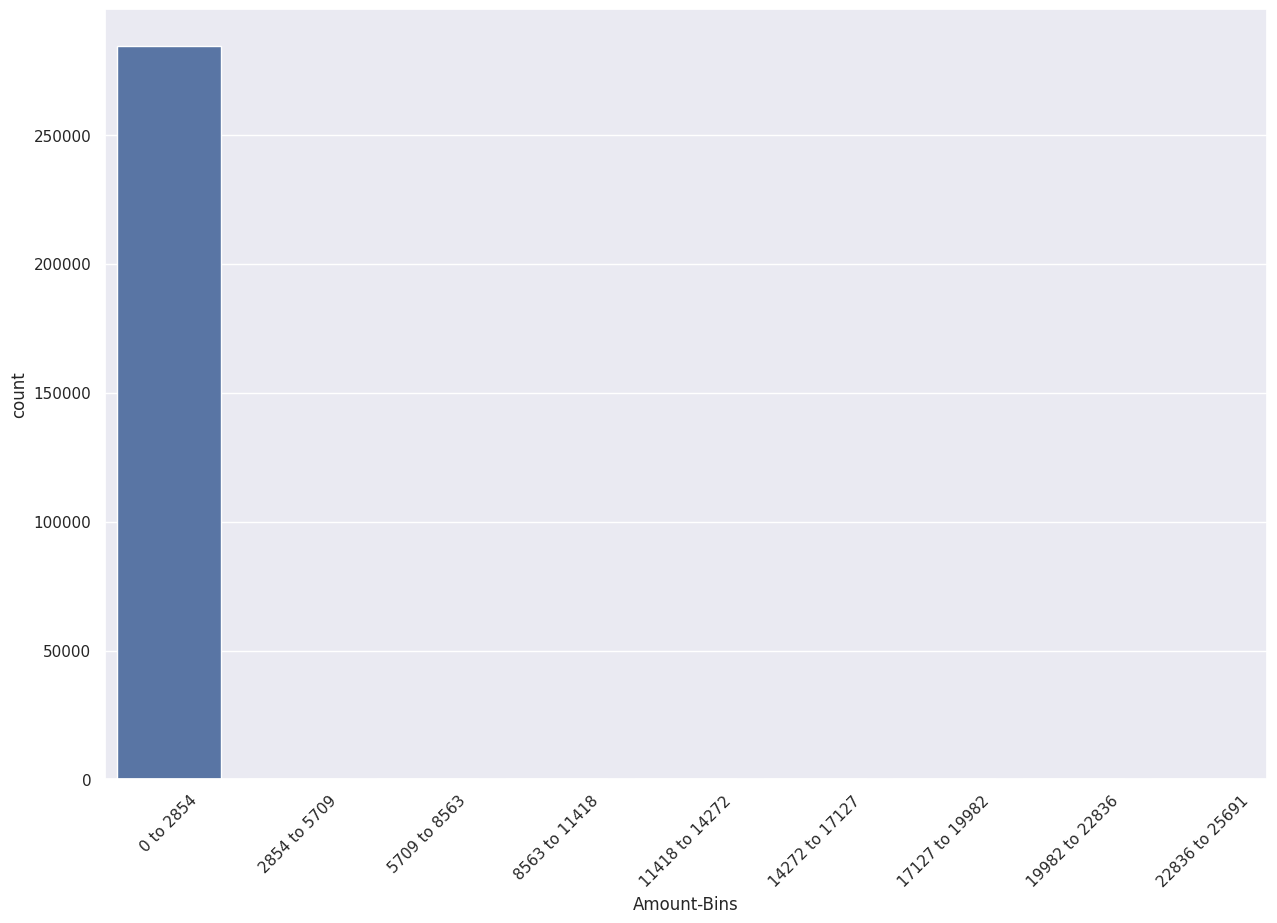

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

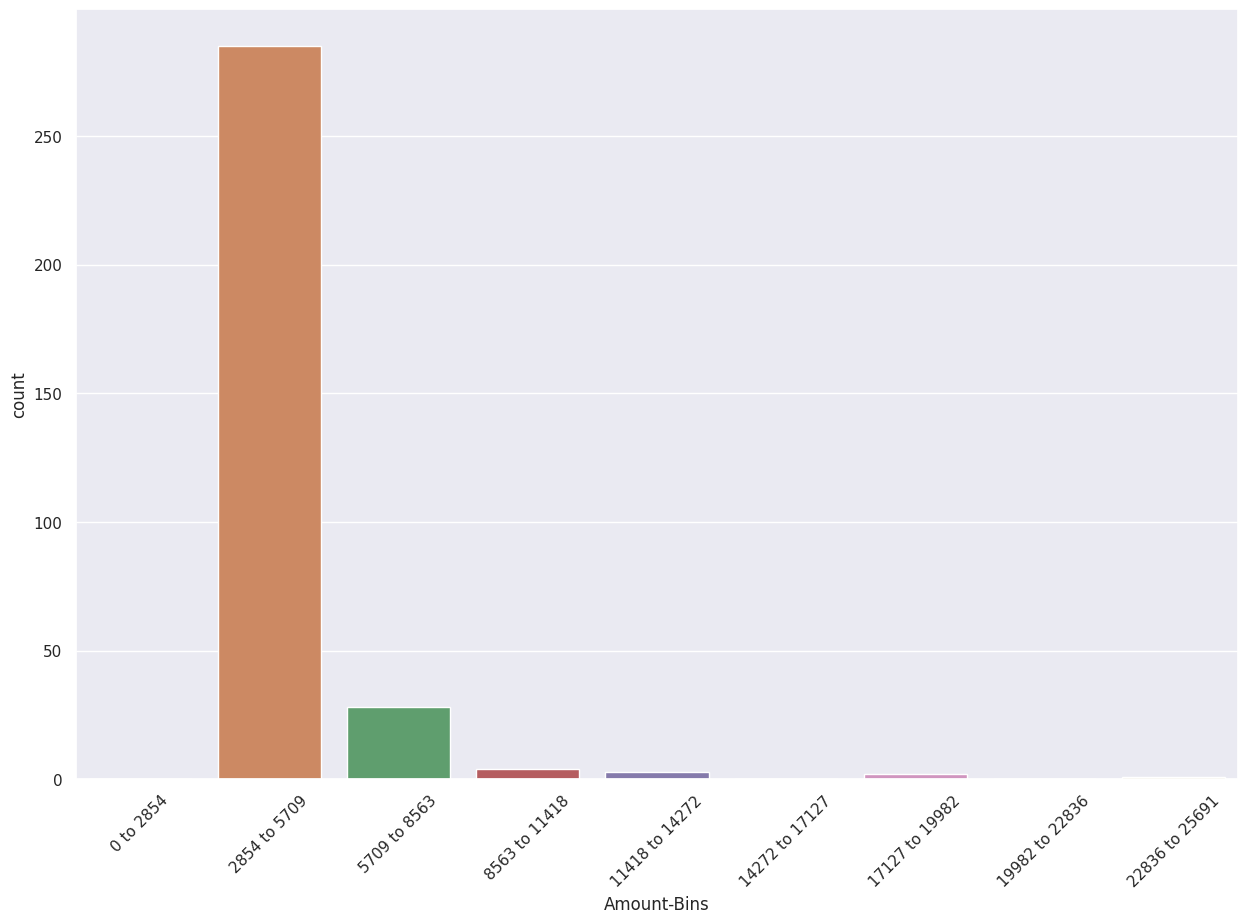

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

In [20]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


In [22]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 39), (284807,))

In [23]:
# splitting and training

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


Variable declaration

In [26]:
#logistic Regression classifier to the model

logistic regression


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.63      0.67       136

    accuracy                           1.00     85443
   macro avg       0.86      0.82      0.83     85443
weighted avg       1.00      1.00      1.00     85443



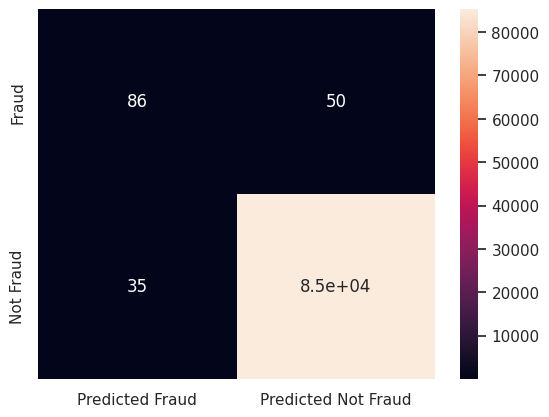

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
# Training the algorithm
lr_model.fit(xtrain, ytrain)
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
 {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix
sns.heatmap(conf_matrix, annot=True)
acc_lr= accuracy_score(ytest, lr_pred_test)
acc_lr
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print(classification_report(ytest, lr_pred_test))
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)
acc = roc_auc_score(ytest, lr_pred_test_prob)
acc
acc_lr = accuracy_score(ytest, lr_pred_test)
prec_lr = precision_score(ytest, lr_pred_test)
rec_lr = recall_score(ytest, lr_pred_test)
f1_lr = f1_score(ytest, lr_pred_test)
results_fullset = pd.DataFrame([['Logistic Regression', acc_lr, rec_lr, prec_lr, f1_lr]],
             columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset
def plot_roc_curve(fpr, tpr, label=None):
  plt.figure(figsize=(8, 6))
  plt.title('ROC Curve', fontsize=15)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.xticks(np.arange(0, 1, 0.05), rotation=90)
  plt.xlabel('False Positive Rates', fontsize=15)
  plt.ylabel('True Positive Rates', fontsize=15)
  plt.legend(loc='best')

  plt.show()
  plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % acc_lr)


In [28]:
results_fullset = pd.DataFrame([['Logistic Regression', acc_lr, rec_lr, prec_lr, f1_lr]],
             columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset


,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.999005,0.632353,0.710744,0.669261


Model Complexity


In [29]:
  from sklearn.linear_model import LogisticRegression
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.metrics import roc_curve, roc_auc_score
  pol_feature = PolynomialFeatures(degree=2)
  X_train_poly = pol_feature.fit_transform(xtrain)
  X_test_poly = pol_feature.fit_transform(xtest)

  # Getting the polynomial features
  poly = PolynomialFeatures(degree=2)
  xtrain_poly = poly.fit_transform(xtrain)
  xtest_poly = poly.fit_transform(xtest)

  # Training the model
  model = LogisticRegression()
  model.fit(xtrain_poly, ytrain)

  # Getting the probabilities
  train_prob = model.predict_proba(xtrain_poly)[:, 1]
  test_prob = model.predict_proba(xtest_poly)[:, 1]

  # Computing the ROC Score
  roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)
  from sklearn.preprocessing import MinMaxScaler
  mod= MinMaxScaler()
  X.head()
  X_scaled = mod.fit_transform(X)
  X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
  X_scaled.head()

  xtrainS, xtestS, ytrainS, ytestS = train_test_split(
      X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)
  print(xtrainS.shape, ytrainS.shape)
  print(xtestS.shape, ytestS.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


SUPPORT VECTOR MACHINE CLASSIFIER


In [30]:
  from sklearn.svm import SVC
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
  from sklearn.metrics import roc_curve, roc_auc_score
  from sklearn.metrics import f1_score
  mod= MinMaxScaler()
  X.head()
  X_scaled = mod.fit_transform(X)
  X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
  X_scaled.head()

  xtrainS, xtestS, ytrainS, ytestS = train_test_split(
      X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)
  print(xtrainS.shape, ytrainS.shape)
  print(xtestS.shape, ytestS.shape)
  svc_model = SVC(kernel='linear', probability=True)
  svc_model.fit(xtrainS, ytrainS)
  svc_pred = svc_model.predict(xtestS)
  svc_recall = recall_score(ytestS, svc_pred) #to predict all the positive samples.
  svc_recall
  svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]
  acc_svm = accuracy_score(ytest,svc_pred)
  acc_svm


  # here we get the auc score
  svc_auc = roc_auc_score(ytestS, svc_pred_prob)

  # to  get the fpr and tpr
  fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

  # # to represent the curve
  # plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)
  acc_svc = accuracy_score(ytestS, svc_pred)
  prec_svc = precision_score(ytestS, svc_pred)
  rec_svc = recall_score(ytestS, svc_pred)
  f1_svc = f1_score(ytestS, svc_pred)






(199364, 39) (199364,)
(85443, 39) (85443,)


In [31]:
results_fullset = pd.DataFrame([['Support Vector Machine', acc_svc, rec_svc, prec_svc, f1_svc]],
                columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,Recall,Precision,F1 Score
0,Support Vector Machine,0.999427,0.801471,0.832061,0.816479


Naive bayes


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#from sklearn.metrics import confusion_matrix,plot_confusion_matrix,f1_score
nb = GaussianNB()
nb.fit(xtrain, ytrain)
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]
mod= MinMaxScaler()
nb_auc = roc_auc_score(ytest,nb_pred)
X_scaled = mod.fit_transform(X)
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
      X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)



acc_nb=accuracy_score(ytest,nb_pred)
acc_nb
cm_nb=confusion_matrix(ytest,nb_pred)
print(cm_nb)
acc_nb = accuracy_score(ytest, nb_pred)


prec_nb = precision_score(ytest, nb_pred)
rec_nb = recall_score(ytest, nb_pred)
f1_nb = f1_score(ytest, nb_pred)
from sklearn.metrics import classification_report
print(classification_report(ytest,nb_pred))
results_fullset = pd.DataFrame([['Naive Bayes', acc_nb, rec_nb, prec_nb, f1_nb]],
              columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset


[[84759   548]
 [   46    90]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.14      0.66      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.83      0.61     85443
weighted avg       1.00      0.99      1.00     85443



,Model,Accuracy,Recall,Precision,F1 Score
0,Naive Bayes,0.993048,0.661765,0.141066,0.232558


DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
dt = DecisionTreeClassifier()
from sklearn.metrics import f1_score
dt.fit(xtrain,ytrain.values.ravel())
dt_pred = dt.predict(xtest)
dt.score(xtest,ytest)
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(ytest,dt_pred)
acc_dt
#from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_dt=confusion_matrix(ytest,dt_pred)
print(cm_dt)
from sklearn.metrics import classification_report
print(classification_report(ytest,dt_pred))
acc_dt = accuracy_score(ytest, dt_pred)
prec_dt = precision_score(ytest, dt_pred)
rec_dt = recall_score(ytest, dt_pred)
f1_dt = f1_score(ytest, dt_pred)
results_fullset = pd.DataFrame([['Decision Trees', acc_dt, rec_dt, prec_dt, f1_dt]],
              columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset



[[85266    41]
 [   25   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.82      0.77       136

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



,Model,Accuracy,Recall,Precision,F1 Score
0,Decision Trees,0.999228,0.816176,0.730263,0.770833


In [36]:
!pip install --upgrade scikit-learn

RANDOM FOREST

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import pandas as pd

rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain.values.ravel())
rf_pred = rf.predict(xtest)
rf.score(xtest, ytest)

acc_rf = accuracy_score(ytest, rf_pred)
prec_rf = precision_score(ytest, rf_pred)
rec_rf = recall_score(ytest, rf_pred)
f1_rf = f1_score(ytest, rf_pred)

# cm_rf = confusion_matrix(ytest, rf_pred)
# print(cm_rf)

# plot_confusion_matrix(rf, xtest, ytest)  # Plot confusion matrix

results_fullset = pd.DataFrame([['random forest', acc_rf, rec_rf, prec_rf, f1_rf]],
                                columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
print(results_fullset)


           Model  Accuracy    Recall  Precision  F1 Score
0  random forest  0.999579  0.794118   0.931034  0.857143


In [41]:
#Comparision of all Classfiers Accuracy
accuracy_dict = {"Logistic Regression": acc_lr,
                  "Random Forest": acc_rf,
                "Decision Trees": acc_dt,
                 "SVM":acc_svm,
                 "Naive Bayes": acc_nb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.999005
Random Forest,0.999579
Decision Trees,0.999228
SVM,0.999427
Naive Bayes,0.993048


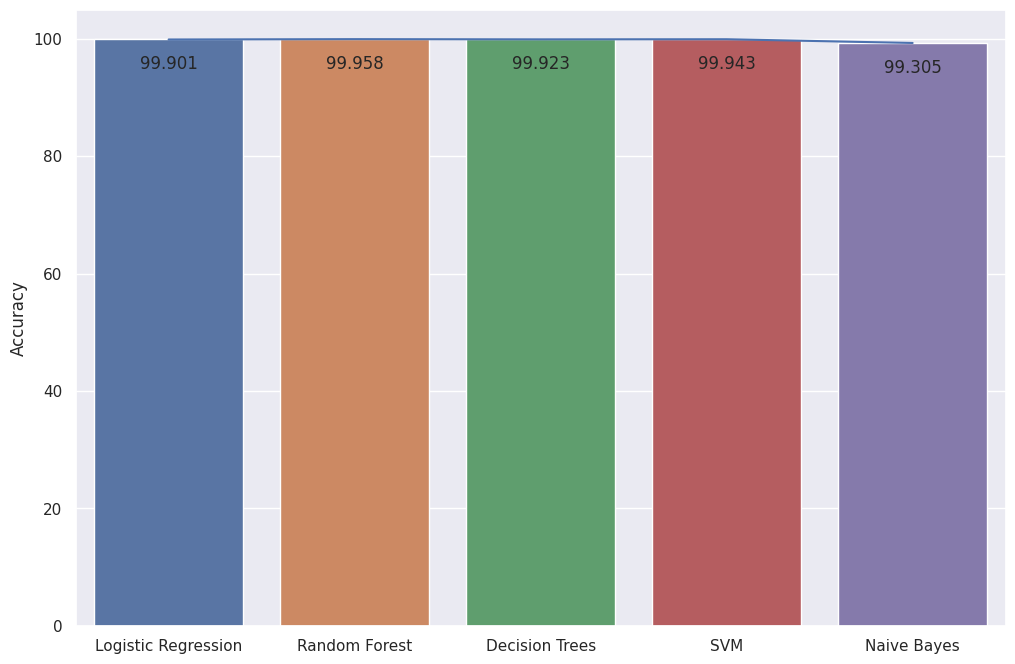

In [42]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")

In [43]:
#Comparision of all Classfiers f1_score
f1_dict = {"Logistic Regression": f1_lr,
                  "Random Forest": f1_rf,
                "Decision Trees": f1_dt,
                 "SVM":f1_svc,
                 "Naive Bayes": f1_nb}

f1_df = pd.DataFrame( pd.Series(f1_dict, index = f1_dict.keys()), columns = ["F1_score"])
f1_df

,F1_score
Logistic Regression,0.669261
Random Forest,0.857143
Decision Trees,0.770833
SVM,0.816479
Naive Bayes,0.232558


In [44]:
model_results = pd.DataFrame([['Logistic Regression', acc_lr, rec_lr, prec_lr, f1_lr],
                              ['Random Forest', acc_rf, rec_rf, prec_rf, f1_rf],
                              ['Decision Trees', acc_dt, rec_dt, prec_dt, f1_dt],
                              ['Support Vector Machine', acc_svc, rec_svc, prec_svc, f1_svc],
                              ['Naive Bayes', acc_nb, rec_nb, prec_nb, f1_nb]],
               columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,Recall,Precision,F1 Score
0,random forest,0.999579,0.794118,0.931034,0.857143
1,Logistic Regression,0.999005,0.632353,0.710744,0.669261
2,Random Forest,0.999579,0.794118,0.931034,0.857143
3,Decision Trees,0.999228,0.816176,0.730263,0.770833
4,Support Vector Machine,0.999427,0.801471,0.832061,0.816479
5,Naive Bayes,0.993048,0.661765,0.141066,0.232558
